# WEATHER_FORECAST_DATA

# Description

This dataset is intended for a binary classification task using logistic regression, aiming to predict rainfall. It includes five key weather attributes: Temperature, Humidity, Wind Speed, Cloud Cover, and Pressure. These variables represent different atmospheric conditions that influence weather patterns. The target variable, Rain, is categorized as either "rain" or "no rain". By analyzing these features, the dataset supports the development of predictive models to determine the probability of rainfall based on historical weather data.

In [22]:
# importing libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# loading data
df=pd.read_csv("D:\data analytics\data set\weather_forecast_data.csv")
print(df.head(20))

    Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0     23.720338  89.592641    7.335604    50.501694  1032.378759     rain
1     27.879734  46.489704    5.952484     4.990053   992.614190  no rain
2     25.069084  83.072843    1.371992    14.855784  1007.231620  no rain
3     23.622080  74.367758    7.050551    67.255282   982.632013     rain
4     20.591370  96.858822    4.643921    47.676444   980.825142  no rain
5     26.147353  48.217260   15.258547    59.766279  1049.738751  no rain
6     20.939680  40.799444    2.232566    45.827508  1014.173766  no rain
7     32.294325  51.848471    2.873621    92.551497  1006.041733  no rain
8     34.091569  48.057114    5.570206    82.524873   993.732047  no rain
9     19.586038  82.978293    5.760537    98.014450  1036.503457     rain
10    29.793126  81.317651   16.926099    93.923294  1029.402690  no rain
11    23.222373  76.877943   15.825673    72.869790   980.108934     rain
12    24.201114  45.146538   11.572713

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [25]:
# cleaning data
df.dropna()
print(df.isna().sum())
print(df.duplicated().sum())

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64
0


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Temperature'),
  Text(1, 0, 'Humidity'),
  Text(2, 0, 'Wind_Speed'),
  Text(3, 0, 'Cloud_Cover'),
  Text(4, 0, 'Pressure')])

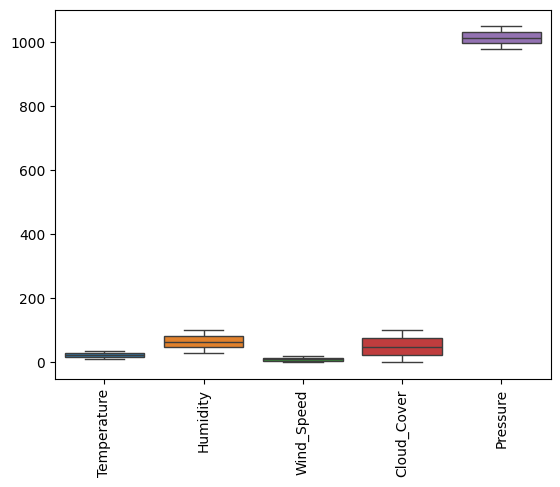

In [26]:
# finding outliers
sns.boxplot(data=df)
plt.xticks(rotation=90)

In [27]:
df.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,22.581725,64.347094,9.906255,49.658104,1014.312336
std,7.326996,19.954739,5.780316,29.123104,20.196433
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.359398,47.339815,4.761909,23.900016,996.938630
50%,22.536448,63.920797,9.908572,49.488284,1013.433035
75%,28.976476,81.561021,14.948408,75.324140,1031.735067
max,34.995214,99.997481,19.999132,99.997795,1049.985593


             Temperature  Humidity  Wind_Speed  Cloud_Cover  Pressure
Temperature     1.000000 -0.014119   -0.004957     0.006632 -0.007489
Humidity       -0.014119  1.000000    0.003816     0.007244 -0.032089
Wind_Speed     -0.004957  0.003816    1.000000    -0.000405  0.018772
Cloud_Cover     0.006632  0.007244   -0.000405     1.000000  0.023100
Pressure       -0.007489 -0.032089    0.018772     0.023100  1.000000


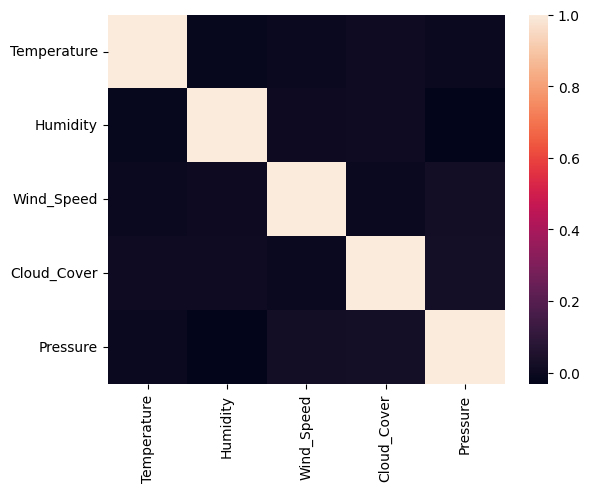

In [28]:
corr=df.corr(numeric_only=True)
print(corr)
sns.heatmap(corr)
plt.show()

In [29]:
# Assigning independant and dependant varibale to x and y 
x= df.iloc[:, :-1] 
y= df.iloc[:, -1]  
print(x)
print(y)

      Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure
0       23.720338  89.592641    7.335604    50.501694  1032.378759
1       27.879734  46.489704    5.952484     4.990053   992.614190
2       25.069084  83.072843    1.371992    14.855784  1007.231620
3       23.622080  74.367758    7.050551    67.255282   982.632013
4       20.591370  96.858822    4.643921    47.676444   980.825142
...           ...        ...         ...          ...          ...
2495    21.791602  45.270902   11.807192    55.044682  1017.686181
2496    27.558479  46.481744   10.884915    39.715133  1008.590961
2497    28.108274  43.817178    2.897128    75.842952   999.119187
2498    14.789275  57.908105    2.374717     2.378743  1046.501875
2499    26.554356  97.101517   18.563084    81.357508  1001.729176

[2500 rows x 5 columns]
0          rain
1       no rain
2       no rain
3          rain
4       no rain
         ...   
2495    no rain
2496    no rain
2497    no rain
2498    no rain
2499    no 

In [30]:
# split x and y into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(x_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [31]:
y_pred=logistic_model.predict(x_test)
# print(y_pred)
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
y_pred = logistic_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, )
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.928
Classification Report:
               precision    recall  f1-score   support

     no rain       0.95      0.97      0.96       540
        rain       0.79      0.65      0.71        85

    accuracy                           0.93       625
   macro avg       0.87      0.81      0.83       625
weighted avg       0.92      0.93      0.93       625

